In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("nfl-suspensions-data.csv")

In [3]:
df

,name,team,games,category,desc.,year,source
0,F. Davis,WAS,Indef.,"Substance abuse, repeated offense",Marijuana-related,2014,http://www.cbssports.com/nfl/eye-on-football/2...
1,J. Blackmon,JAX,Indef.,"Substance abuse, repeated offense",NaN,2014,http://espn.go.com/nfl/story/_/id/11257934/jus...
2,L. Brazill,IND,Indef.,"Substance abuse, repeated offense",NaN,2014,http://www.nfl.com/news/story/0ap2000000364622...
3,T. Jackson,WAS,Indef.,"Substance abuse, repeated offense",NaN,2014,http://www.nfl.com/news/story/0ap2000000364087...
4,M. Hapes,NYG,Indef.,Personal conduct,Gambling-related,1946,http://espn.go.com/blog/nflnation/tag/_/name/f...
...,...,...,...,...,...,...,...
264,T. Hali,KC,1,Substance abuse,NaN,2012,http://espn.go.com/nfl/trainingcamp12/story/_/...
265,I. Pead,STL,1,Substance abuse,Marijuana-related,2013,http://www.nfl.com/news/story/0ap1000000208343...
266,D. Reed,BAL,1,Substance abuse,Marijuana-related,2011,http://www.nfl.com/news/story/09000d5d821eb87b...
267,L. Wilson,NO,1,Substance abuse,Marijuana-related,2012,http://profootballtalk.nbcsports.com/2012/07/0...


In [4]:
df.head()

,name,team,games,category,desc.,year,source
0,F. Davis,WAS,Indef.,"Substance abuse, repeated offense",Marijuana-related,2014,http://www.cbssports.com/nfl/eye-on-football/2...
1,J. Blackmon,JAX,Indef.,"Substance abuse, repeated offense",NaN,2014,http://espn.go.com/nfl/story/_/id/11257934/jus...
2,L. Brazill,IND,Indef.,"Substance abuse, repeated offense",NaN,2014,http://www.nfl.com/news/story/0ap2000000364622...
3,T. Jackson,WAS,Indef.,"Substance abuse, repeated offense",NaN,2014,http://www.nfl.com/news/story/0ap2000000364087...
4,M. Hapes,NYG,Indef.,Personal conduct,Gambling-related,1946,http://espn.go.com/blog/nflnation/tag/_/name/f...


In [5]:
df.tail()

,name,team,games,category,desc.,year,source
264,T. Hali,KC,1,Substance abuse,NaN,2012,http://espn.go.com/nfl/trainingcamp12/story/_/...
265,I. Pead,STL,1,Substance abuse,Marijuana-related,2013,http://www.nfl.com/news/story/0ap1000000208343...
266,D. Reed,BAL,1,Substance abuse,Marijuana-related,2011,http://www.nfl.com/news/story/09000d5d821eb87b...
267,L. Wilson,NO,1,Substance abuse,Marijuana-related,2012,http://profootballtalk.nbcsports.com/2012/07/0...
268,D. Scott,MIN,3,Personal conduct,Child endangerment,2008,http://sports.espn.go.com/nfl/news/story?id=34...


In [6]:
df.describe()

,name,team,games,category,desc.,year,source
count,269,269,269,269,91,269,269
unique,244,34,14,6,42,29,236
top,W. Hill,DEN,4,PEDs,Marijuana-related,2012,http://espn.go.com/blog/nflnation/tag/_/name/f...
freq,3,19,158,134,16,45,7


In [7]:
df.shape

(269, 7)

In [8]:
df.info() 
#games and year should not be objects, they should be integers; need to be fixed or else we can't do data analysis using mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      269 non-null    object
 1   team      269 non-null    object
 2   games     269 non-null    object
 3   category  269 non-null    object
 4   desc.     91 non-null     object
 5   year      269 non-null    object
 6   source    269 non-null    object
dtypes: object(7)
memory usage: 14.8+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum() 

name          0
team          0
games         0
category      0
desc.       178
year          0
source        0
dtype: int64

In [11]:
df1 = df.drop(['source','name', 'desc.'], axis=1) # don't need "source" "name" or "desc." 
df1

,team,games,category,year
0,WAS,Indef.,"Substance abuse, repeated offense",2014
1,JAX,Indef.,"Substance abuse, repeated offense",2014
2,IND,Indef.,"Substance abuse, repeated offense",2014
3,WAS,Indef.,"Substance abuse, repeated offense",2014
4,NYG,Indef.,Personal conduct,1946
...,...,...,...,...
264,KC,1,Substance abuse,2012
265,STL,1,Substance abuse,2013
266,BAL,1,Substance abuse,2011
267,NO,1,Substance abuse,2012


In [12]:
df1 = df1.rename(columns={"games":"suspended games"})
df1

,team,suspended games,category,year
0,WAS,Indef.,"Substance abuse, repeated offense",2014
1,JAX,Indef.,"Substance abuse, repeated offense",2014
2,IND,Indef.,"Substance abuse, repeated offense",2014
3,WAS,Indef.,"Substance abuse, repeated offense",2014
4,NYG,Indef.,Personal conduct,1946
...,...,...,...,...
264,KC,1,Substance abuse,2012
265,STL,1,Substance abuse,2013
266,BAL,1,Substance abuse,2011
267,NO,1,Substance abuse,2012


In [13]:
df1.sort_values(by=['suspended games'], ascending=False, inplace=True)

In [14]:
df1[:10]

,team,suspended games,category,year
0,WAS,Indef.,"Substance abuse, repeated offense",2014
2,IND,Indef.,"Substance abuse, repeated offense",2014
3,WAS,Indef.,"Substance abuse, repeated offense",2014
4,NYG,Indef.,Personal conduct,1946
5,BAL,Indef.,Personal conduct,2014
1,JAX,Indef.,"Substance abuse, repeated offense",2014
25,SEA,8,"PEDs, repeated offense",2013
32,BAL,8,Personal conduct,2006
31,CIN,8,Personal conduct,2007
30,CLE,8,"PEDs, repeated offense",2010


In [15]:
df2 = df1.replace(['Indef.'],'999')
df2

,team,suspended games,category,year
0,WAS,999,"Substance abuse, repeated offense",2014
2,IND,999,"Substance abuse, repeated offense",2014
3,WAS,999,"Substance abuse, repeated offense",2014
4,NYG,999,Personal conduct,1946
5,BAL,999,Personal conduct,2014
...,...,...,...,...
240,WAS,1,In-game violence,2013
239,DEN,1,In-game violence,2012
238,PIT,1,In-game violence,2011
237,TEN,1,In-game violence,2013


In [16]:
df2['suspended games'] = pd.to_numeric(df2['suspended games'])
df2['year'] = pd.to_numeric(df2['year']) #error! 

ValueError: Unable to parse string "   " at position 234

In [17]:
df2[234:235] #we have a year with no input, must be cleaned

,team,suspended games,category,year
22,GB,14,Personal conduct,


In [18]:
df2 = df2.drop(df2.index[234], axis=0)

In [19]:
df2['year'] = pd.to_numeric(df2['year'])

In [20]:
df2.info() #now the numeric types have been rightfully labeled as integers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 236
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team             268 non-null    object
 1   suspended games  268 non-null    int64 
 2   category         268 non-null    object
 3   year             268 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 10.5+ KB


In [21]:
weighted = df2[6:] #this is to exclude indefinite suspensions so that we get better average results

In [22]:
weighted.describe()

,suspended games,year
count,262.000000,262.000000
mean,4.625954,2007.015267
std,4.441766,8.527606
min,1.000000,1947.000000
25%,3.000000,2005.000000
50%,4.000000,2010.000000
75%,4.000000,2012.000000
max,36.000000,2014.000000


In [23]:
df2.category.unique()

array(['Substance abuse, repeated offense', 'Personal conduct',
       'PEDs, repeated offense', 'PEDs', 'In-game violence',
       'Substance abuse'], dtype=object)

In [24]:
category = df2['category'].value_counts(normalize=True)  #broken down by percentage

In [25]:
category #will be visualized later

PEDs                                 0.500000
Personal conduct                     0.220149
Substance abuse                      0.145522
Substance abuse, repeated offense    0.074627
In-game violence                     0.037313
PEDs, repeated offense               0.022388
Name: category, dtype: float64

In [26]:
labels = ['PEDs', 'Personal conduct', 'Substance abuse', 'Substance abuse, repeated offense', 'In-game violence', 'PEDs, repeated offense']

In [27]:
teams = df2['team'].value_counts() #which teams get penalized the most?

In [28]:
teams #will be visualized later

DEN     19
WAS     14
TEN     11
MIN     11
KC      11
JAX     10
SEA     10
CAR     10
CIN     10
NYG     10
BAL      9
CLE      9
TB       9
NYJ      8
GB       8
ARI      8
STL      8
MIA      8
IND      8
ATL      7
CHI      7
DET      7
PHI      6
FREE     6
BUF      6
PIT      6
OAK      5
HOU      5
SD       5
NE       4
NO       4
SF       4
DAL      3
LA       2
Name: team, dtype: int64

In [29]:
#data wrangling and Data Aggregation

In [30]:
def team_hist(x):
    df3 = df2.set_index(['team', 'category'])
    df3.sort_values(by=['category', 'year'], ascending = False, inplace=True)
    return df3.loc[x]

In [31]:
team_hist(['DEN'])

suspended games  year
team category                               
DEN  Substance abuse                 4  2014
     Substance abuse                 4  2013
     Substance abuse                 4  1989
     Personal conduct                3  2014
     Personal conduct                3  2012
     Personal conduct                1  2012
     Personal conduct                2  2007
     Personal conduct                1  2003
     PEDs                            4  2014
     PEDs                            6  2012
     PEDs                            6  2012
     PEDs                            4  2012
     PEDs                            6  2007
     PEDs                            4  2007
     PEDs                            4  2006
     PEDs                            4  2005
     PEDs                            4  2004
     In-game violence                1  2013
     In-game violence                1  2012

In [32]:
def team_susp_count(x):
    df3 = df2[['team', 'category', 'suspended games']]
    df4 = df3[df3['team'] == x]
    susp = df4.groupby(['team', 'category']).count()
    return susp

In [33]:
team_susp_count('DEN')

suspended games
team category                         
DEN  In-game violence                2
     PEDs                            9
     Personal conduct                5
     Substance abuse                 3

In [34]:
def mean_susp(x):
    df3 = weighted.set_index(['team', 'category'])
    df3 = df3[['suspended games']]
    return df3.loc[x].mean()

In [59]:
mean_susp('DEN')

suspended games    3.473684
dtype: float64

In [36]:
def mean_susp_cat(x):
    df3 = weighted[['team', 'category', 'suspended games']]
    df4 = df3[df3['team'] == x]
    susp = df4.groupby(['team', 'category']).mean()
    return susp

In [52]:
mean_susp_cat('DEN')

suspended games
team category                         
DEN  In-game violence         1.000000
     PEDs                     4.666667
     Personal conduct         2.000000
     Substance abuse          4.000000

In [38]:
#suspension length by category

In [39]:
misconduct = weighted[['category', 'suspended games']]

In [40]:
misconduct.groupby(misconduct['category']).mean()

,suspended games
category,
In-game violence,1.800000
PEDs,3.977612
"PEDs, repeated offense",8.000000
Personal conduct,4.122807
Substance abuse,3.384615
"Substance abuse, repeated offense",15.375000


In [41]:
results = df2[['team', 'category', 'year']]
results.set_index('team',inplace=True)

In [42]:
results.head(20)

,category,year
team,,
WAS,"Substance abuse, repeated offense",2014
IND,"Substance abuse, repeated offense",2014
WAS,"Substance abuse, repeated offense",2014
NYG,Personal conduct,1946
BAL,Personal conduct,2014
JAX,"Substance abuse, repeated offense",2014
SEA,"PEDs, repeated offense",2013
BAL,Personal conduct,2006
CIN,Personal conduct,2007


In [43]:
diff_results = results.pivot_table(index='year',columns='category',aggfunc=len)
diff_results = diff_results = diff_results.replace(np.nan,0)

In [44]:
diff_results.head(30)

category,In-game violence,PEDs,"PEDs, repeated offense",Personal conduct,Substance abuse,"Substance abuse, repeated offense"
year,,,,,,
1946,0.0,0.0,0.0,1.0,0.0,0.0
1947,0.0,0.0,0.0,1.0,0.0,0.0
1963,0.0,0.0,0.0,1.0,0.0,0.0
1983,0.0,0.0,0.0,1.0,0.0,0.0
1986,1.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,14.0,0.0,0.0,2.0,1.0
1990,0.0,3.0,0.0,0.0,0.0,0.0
1993,0.0,1.0,0.0,0.0,0.0,0.0
1994,0.0,1.0,0.0,0.0,0.0,0.0


([<matplotlib.patches.Wedge at 0x134e557e820>,
 [Text(1.3471114790620887e-16, 2.2, 'PEDs'),
  Text(-1.6944714233292484, -1.4031274338136763, 'Personal conduct'),
  Text(0.5859912281037408, -2.1205221716797658, 'Substance abuse'),
  Text(1.8037764651988328, -1.2595199337822345, 'Substance abuse, repeated offense'),
  Text(2.1272454640787446, -0.5610942305499206, 'In-game violence'),
  Text(2.194560647975266, -0.15460776939850462, 'PEDs, repeated offense')],
 [Text(7.347880794884119e-17, 1.2, '50.0%'),
  Text(-0.9242571399977717, -0.7653422366256415, '22.0%'),
  Text(0.3196315789656768, -1.156648457279872, '14.6%'),
  Text(0.983878071926636, -0.6870108729721278, '7.5%'),
  Text(1.1603157076793151, -0.3060513984817748, '3.7%'),
  Text(1.1970330807137814, -0.08433151058100252, '2.2%')])

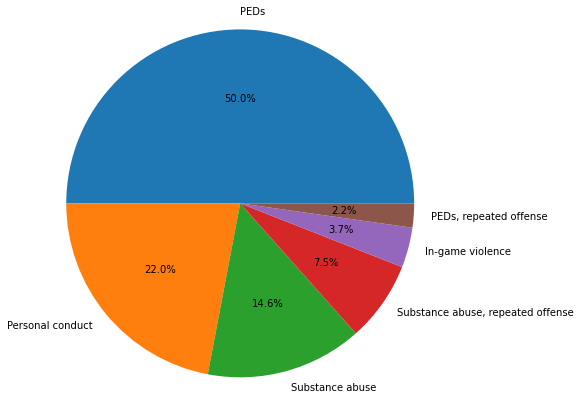

In [45]:
plt.pie(category, labels = labels, autopct='%1.1f%%', radius = 2, normalize = False)

<AxesSubplot:>

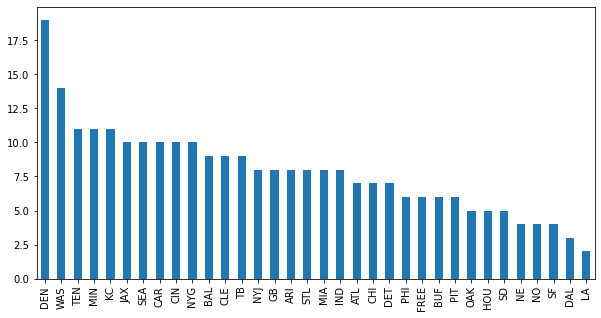

In [46]:
teams.plot.bar(figsize=(10,5))

Text(0, 0.5, 'Number of suspensions')

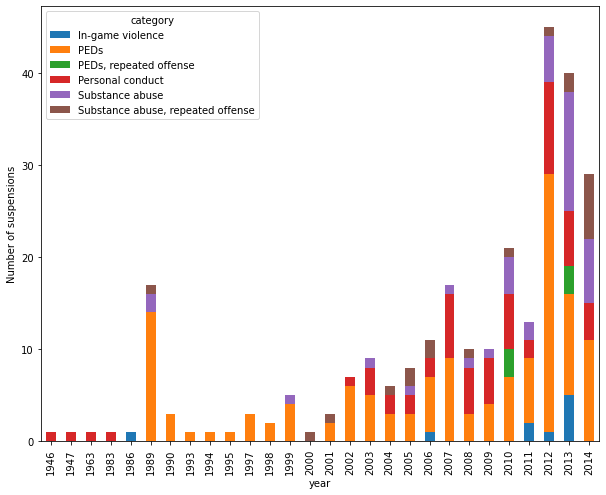

In [47]:
diff_results.plot.bar(stacked=True, figsize=(10,8))
plt.xlabel('year')
plt.ylabel('Number of suspensions')

<AxesSubplot:xlabel='category'>

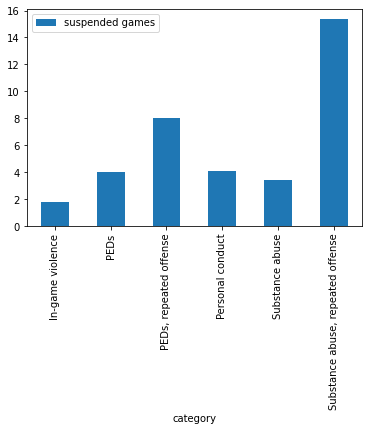

In [48]:
misconduct.groupby(misconduct['category']).mean().plot.bar()